In [1]:
api_key= 'your_api_key'


In [18]:
from flexcpi.toolkit import (
    load_catalog_tables,
    load_weight_tables,
    keyword_search_cpi,
    match_series_ids_to_weights,
    fetch_cpi_series_data,
    compute_custom_cpi_index,
    plot_custom_cpi,
    assign_manual_weights,
    plot_inflation_comparison,
    auto_select_series,
    compute_inflation_rate,
    forecast_custom_cpi,
    export_cpi_data
)

In [3]:
# 1. Load CPI series catalog and weights
full_catalog = load_catalog_tables()
table1, table2 = load_weight_tables()


In [4]:
# Search for "rent" only in U.S. city average
keyword_search_cpi(full_catalog, keyword="rent", area_filter="Northeast", max_results=10)


,series_id,item_name,area_name
773,CUUR0100SAS2RS,Rent of shelter,Northeast
776,CUUR0100SASL2RS,Services less rent of shelter,Northeast
785,CUUR0100SEHA,Rent of primary residence,Northeast
786,CUUR0100SEHC,Owners' equivalent rent of residences,Northeast
787,CUUR0100SEHC01,Owners' equivalent rent of primary residence,Northeast
2246,CUURN100SASL2RS,Services less rent of shelter,Northeast - Size Class B/C
2254,CUURN100SEHA,Rent of primary residence,Northeast - Size Class B/C
2255,CUURN100SEHC,Owners' equivalent rent of residences,Northeast - Size Class B/C
2256,CUURN100SEHC01,Owners' equivalent rent of primary residence,Northeast - Size Class B/C
2569,CUURS100SASL2RS,Services less rent of shelter,Northeast - Size Class A


In [5]:
# Search for CPI series with keyword
matches = keyword_search_cpi(full_catalog, keyword="transportation", area_filter="U.S. city average")
matches



,series_id,item_name,area_name
61,CUSR0000SAS24,Utilities and public transportation,U.S. city average
64,CUSR0000SAS4,Transportation services,U.S. city average
68,CUSR0000SAT,Transportation,U.S. city average
69,CUSR0000SAT1,Private transportation,U.S. city average
70,CUSR0000SATCLTB,Transportation commodities less motor fuel,U.S. city average
269,CUSR0000SETG,Public transportation,U.S. city average
271,CUSR0000SETG02,Other intercity transportation,U.S. city average
390,CUUR0000SAS24,Utilities and public transportation,U.S. city average
393,CUUR0000SAS4,Transportation services,U.S. city average
397,CUUR0000SAT,Transportation,U.S. city average


In [6]:
series_ids = [
    "CUSR0000SAS2RS",
    "CUSR0000SA0L1",
    "CUSR0000SA311",
    "CUSR0000SAS24"
]

In [7]:
matched_df= match_series_ids_to_weights(
    series_ids=series_ids,
    full_catalog=full_catalog,
    weights_df=table1,  # or table2
    use="cpi_u_weight",
    cutoff=0.7
)

matched_df

,series_id,item_name,matched_category,weight,normalized_weight
0,CUSR0000SAS2RS,rent of shelter,shelter,0.35483,0.229613
1,CUSR0000SA0L1,all items less food,all items,1.00000,0.647107
2,CUSR0000SA311,apparel less footwear,apparel,0.02480,0.016048
3,CUSR0000SAS24,utilities and public transportation,transportation,0.16571,0.107232


In [8]:

fetch_cpi_series_data(
    series_ids=series_ids,
    start_year=2020,     # Optional, default = 5 years ago
    end_year=2024,       # Optional, default = current year
    api_key=api_key         # Optional if you don’t have a BLS API key
)

,series_id,year,month,value
0,CUSR0000SAS2RS,2024,12,426.354
1,CUSR0000SAS2RS,2024,11,425.201
2,CUSR0000SAS2RS,2024,10,423.847
3,CUSR0000SAS2RS,2024,9,422.341
4,CUSR0000SAS2RS,2024,8,421.164
...,...,...,...,...
235,CUSR0000SAS24,2020,5,214.040
236,CUSR0000SAS24,2020,4,215.041
237,CUSR0000SAS24,2020,3,217.683
238,CUSR0000SAS24,2020,2,220.246


In [9]:
custom_cpi= compute_custom_cpi_index(matched_df, start_year=2019,end_year=2023)
custom_cpi

,year,month,custom_cpi_index,date
0,2019,1,263.098580,2019-01-01
1,2019,2,263.868726,2019-02-01
2,2019,3,264.834058,2019-03-01
3,2019,4,265.825465,2019-04-01
4,2019,5,266.025541,2019-05-01
5,2019,6,266.153794,2019-06-01
6,2019,7,266.792944,2019-07-01
7,2019,8,267.148535,2019-08-01
8,2019,9,267.682322,2019-09-01
9,2019,10,268.328195,2019-10-01


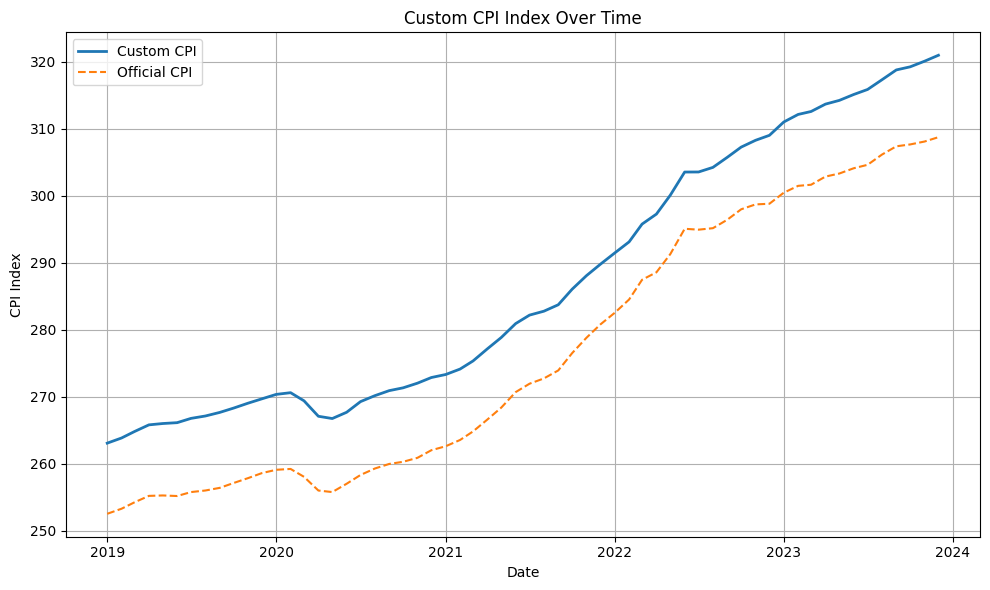

In [10]:
plot_custom_cpi(custom_cpi, compare_to_actual=True, api_key=api_key)


In [11]:
series_ids = ["CUSR0000SAS2RS", "CUSR0000SA0L1"]
manual_weights = {
    "CUSR0000SAS2RS": 0.4,
    "CUSR0000SA0L1": 0.6
}

matched_df = assign_manual_weights(series_ids, manual_weights)
matched_df

,series_id,raw_weight,normalized_weight
0,CUSR0000SAS2RS,0.4,0.4
1,CUSR0000SA0L1,0.6,0.6


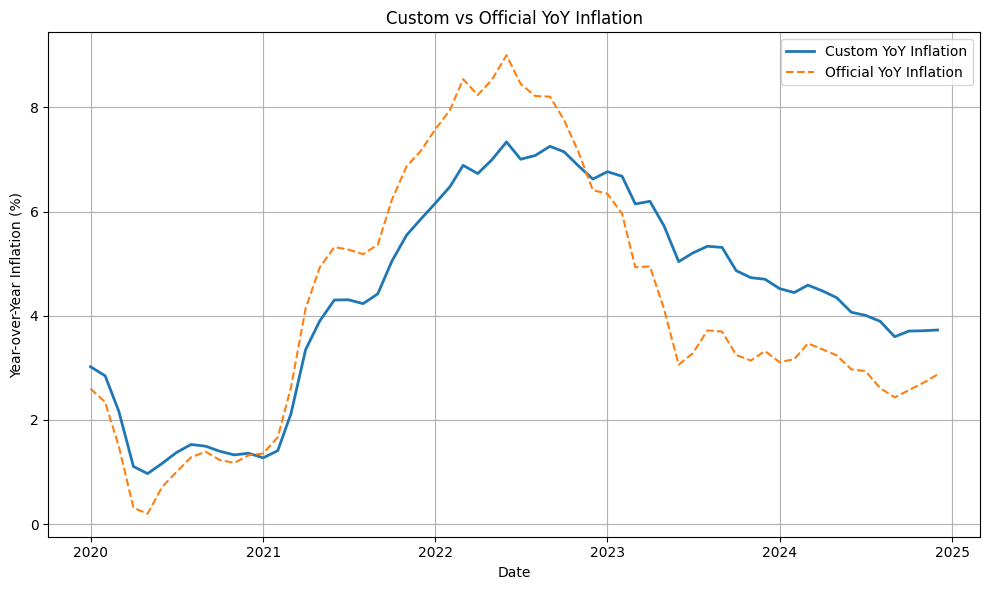

In [12]:
custom_df = compute_custom_cpi_index(matched_df, start_year=2019, end_year=2024, api_key=api_key)
custom_df = compute_inflation_rate(custom_df)

plot_inflation_comparison(custom_df, compare_to_actual=True, api_key=api_key)


In [15]:
series_ids = auto_select_series(["rent", "food"], full_catalog)
print(series_ids)

['CUSR0000SAS2RS', 'CUSR0000SA0L1']


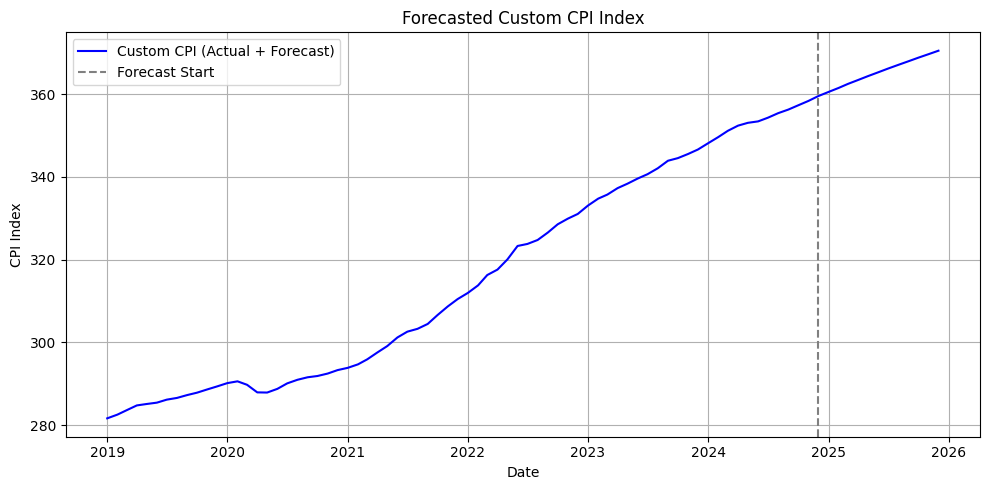

In [20]:
forecast_df = forecast_custom_cpi(
    custom_cpi_df=custom_df,
    forecast_periods=12,
    order=(1, 1, 1),
    plot=True
)

In [ ]:
export_cpi_data(
    index_df=custom_df,
    basket_df=matched_df,
    out_dir="your_path_here",
    base_name="flexcpi_output"
)